In [3]:
import pandas as pd
import numpy as np

# Data collection

In [4]:
df=pd.read_csv('C:/Users/Somappa T/Desktop/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


 # Exploratory Data Analysis (EDA)

In [6]:
df.shape

(150, 6)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.duplicated().sum()

np.int64(0)

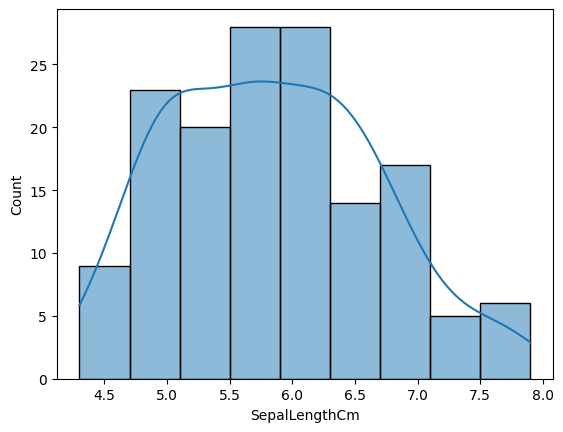

<Axes: xlabel='SepalWidthCm'>

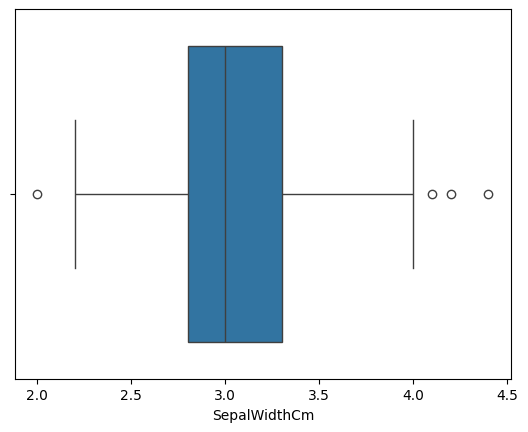

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SepalLengthCm'], kde=True)
plt.show()

sns.boxplot(x=df['SepalWidthCm'])


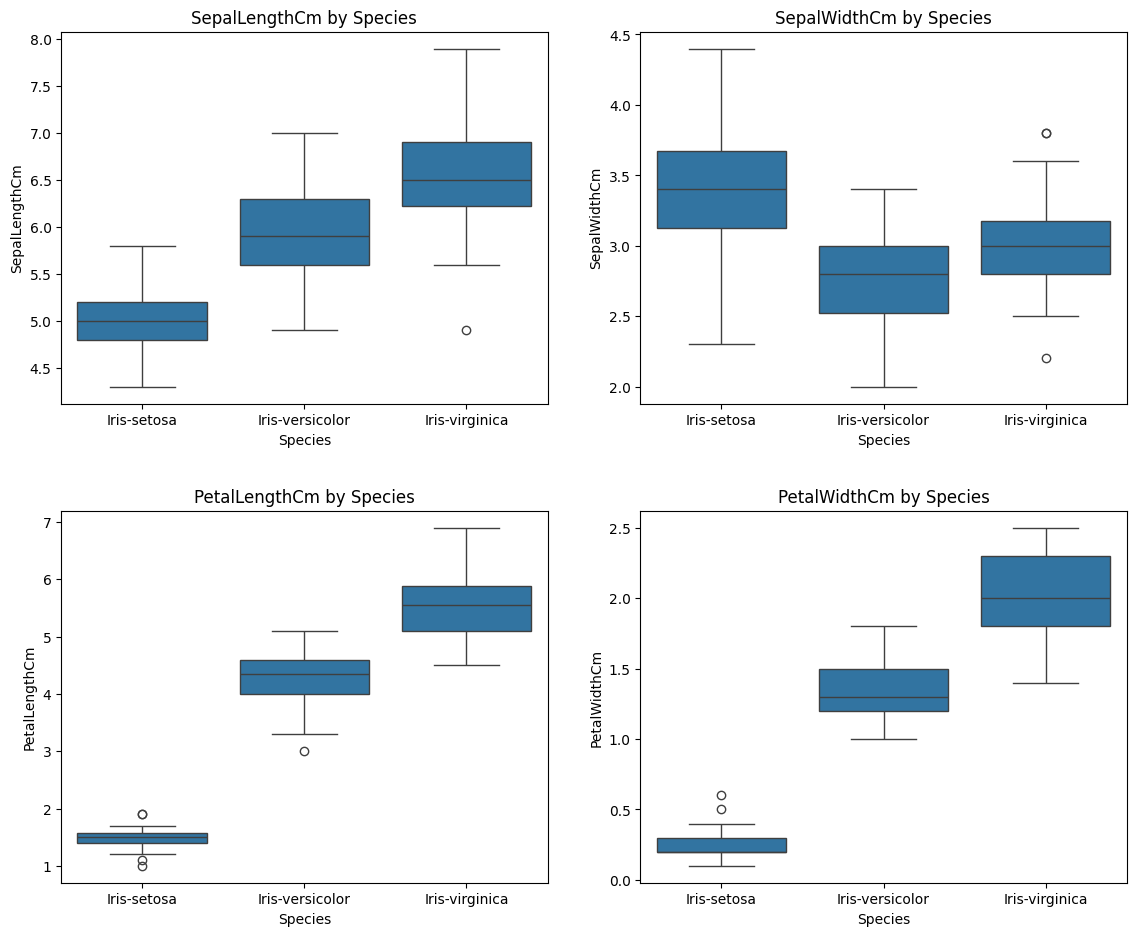

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List the 4 columns you want to plot
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Set figure size
plt.figure(figsize=(12, 10))

# Create 4 boxplots in 2 rows and 2 columns
for i, column in enumerate(features):
    plt.subplot(2, 2, i + 1)  # (rows, columns, position)
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(f'{column} by Species')
    plt.tight_layout(pad=3.0)  # Add spacing between plots

plt.show()


# Data preprocessing

In [26]:
df['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [62]:
# as data not contain any missing values and no errors
# it is in normalised form so we are moving  to next step.

# Segregation of data

In [39]:
x=df.drop(columns=['Id', 'Species'])
y=df['Species']



# Splitting dataset into Train and Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=20)

# Model Selection

In [42]:
# we check all classification models accuracy here based on we select & continue further
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Check accuracy of each model
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name}: {accuracy:.2f}")


Logistic Regression: 0.93
Decision Tree: 0.93
Random Forest: 0.90
SVM: 1.00
KNN: 0.97


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)





RandomForestClassifier(random_state=42)

In [44]:
# Predict on test data
y_pred = rf_model.predict(x_test)



# model evaluation

In [45]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9

Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  3  8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.93      0.91      0.91        30
   weighted avg       0.92      0.90      0.90        30



# predicting with outside data

In [50]:
import numpy as np

# Prompt user for input
sepal_length = float(input("Enter Sepal Length (cm): "))
sepal_width = float(input("Enter Sepal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))

# Combine inputs into a 2D array for model
new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Predict using trained Random Forest model
predicted_species = rf_model.predict(new_data)[0]

# Optional: map prediction if you used encoding
# species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
# print("Predicted Species:", species_map[predicted_species])

# If not encoded (direct labels), just print:
print("Predicted Species:", predicted_species)


Predicted Species: Iris-virginica


c:\Users\Somappa T\Desktop\Iris flower classification\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# making the pickle model

In [51]:
import pickle
# Save the trained model using pickle
with open("iris_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("✅ Model saved as iris_model.pkl")

✅ Model saved as iris_model.pkl
